In [2]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [75]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install



In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, KFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, KBinsDiscretizer, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, RANSACRegressor, Ridge, Lasso, LinearRegression
from sklearn.metrics import recall_score, precision_score, f1_score, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_curve, precision_recall_curve, PrecisionRecallDisplay, make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer, make_column_selector,make_column_transformer, TransformedTargetRegressor
import category_encoders as ce
from scipy import stats
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, KBinsDiscretizer

### Область работы 2 (поиск  модели .... )

In [81]:
#читаем файл, смотрим основную инфу
path_train = "train.csv"
df = pd.read_csv(path_train)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.55,Ideal,I,SI1,61.7,55.0,1134,5.29,5.31,3.27
1,0.94,Premium,E,SI1,62.4,56.0,4580,6.27,6.24,3.90
2,0.33,Premium,E,SI2,60.0,59.0,594,4.49,4.47,2.69
3,0.31,Ideal,D,VS2,59.4,56.0,879,4.45,4.40,2.63
4,2.01,Very Good,H,SI1,62.8,59.0,17759,7.99,8.04,5.03
...,...,...,...,...,...,...,...,...,...,...
40450,1.50,Very Good,D,SI1,60.7,62.0,11442,7.30,7.33,4.44
40451,1.51,Ideal,D,SI1,61.9,57.0,11834,7.35,7.42,4.57
40452,0.42,Ideal,G,SI2,60.9,56.0,971,4.87,4.89,2.97
40453,2.05,Premium,E,SI2,59.7,59.0,17237,8.39,8.27,4.97


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [85]:
df.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.00000
mean,0.797227,61.746219,57.451551,3938.457274,5.728667,5.732720,3.53753
std,0.474440,1.420742,2.230915,3998.851904,1.123597,1.153284,0.70956
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.00000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.91000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.53000
75%,1.040000,62.500000,59.000000,5324.500000,6.540000,6.530000,4.03000
max,5.010000,78.200000,95.000000,18818.000000,10.740000,58.900000,31.80000


## Убираем простые головные боли данных

In [88]:
df = df.drop_duplicates()
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
40450,1.50,Very Good,D,SI1,60.7,62.0,11442,7.30,7.33,4.44
40451,1.51,Ideal,D,SI1,61.9,57.0,11834,7.35,7.42,4.57
40452,0.42,Ideal,G,SI2,60.9,56.0,971,4.87,4.89,2.97
40453,2.05,Premium,E,SI2,59.7,59.0,17237,8.39,8.27,4.97
40454,0.55,Premium,H,VVS1,61.1,57.0,1980,5.35,5.26,3.24


In [90]:
#также посмотрим детально и заменим на na очевидные проблемы  в данных
#На стоимость и караты не обращаем внимания, судя по данным они такими и должны быть

# Установка порогов для каждого столбца
thresholds = {                
    'x': (3, 15),
    'y': (3, 15),
    'z': (1, 10)
}

# Поиск строк с ошибками и подсчёт количества ошибок по столбцам
error_counts = {}  # Словарь для подсчета ошибок по столбцам

for col, (min_val, max_val) in thresholds.items():
    mask = (df[col] < min_val) | (df[col] > max_val)
    error_counts[col] = mask.sum()  # Считаем количество ошибок в каждом столбце
    # Замена некорректных значений на NaN
    df.loc[mask, col] = 0

print("DataFrame после замены ошибок на NaN:")
df.describe()

DataFrame после замены ошибок на NaN:


,carat,depth,table,price,x,y,z
count,40377.00000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000
mean,0.79713,61.745600,57.452126,3938.759690,5.728777,5.730639,3.536795
std,0.47404,1.420043,2.231121,3998.041468,1.122689,1.114917,0.695159
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,946.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.000000,6.540000,6.530000,4.030000
max,5.01000,78.200000,95.000000,18818.000000,10.740000,10.540000,8.060000


In [92]:
#проверим нет ли ошибок в категориальных переменных
for column in ['cut', 'color', 'clarity']:
    unique_values = df[column].unique()
    print(f"Уникальные значения для {column}: {unique_values}")

Уникальные значения для cut: ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
Уникальные значения для color: ['I' 'E' 'D' 'H' 'F' 'G' 'J']
Уникальные значения для clarity: ['SI1' 'SI2' 'VS2' 'VS1' 'VVS1' 'VVS2' 'IF' 'I1']


## Находим неочевидные закономерности данных, которые могут повлиять на модель

(0.2, 3.0)

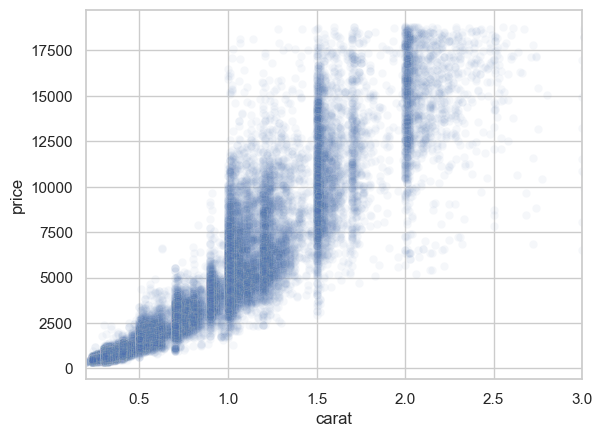

In [95]:
#видим проблему каратной цикличности, будем решать как-то
#главное понимаем, что с колонкой carat нужно что-то сделать, дабы избавиться от фиксированных интервалов между частыми значениями, логарифм например
sns.scatterplot(data = df, x = 'carat', y = 'price', alpha=0.05);
plt.xlim(0.2, 3)

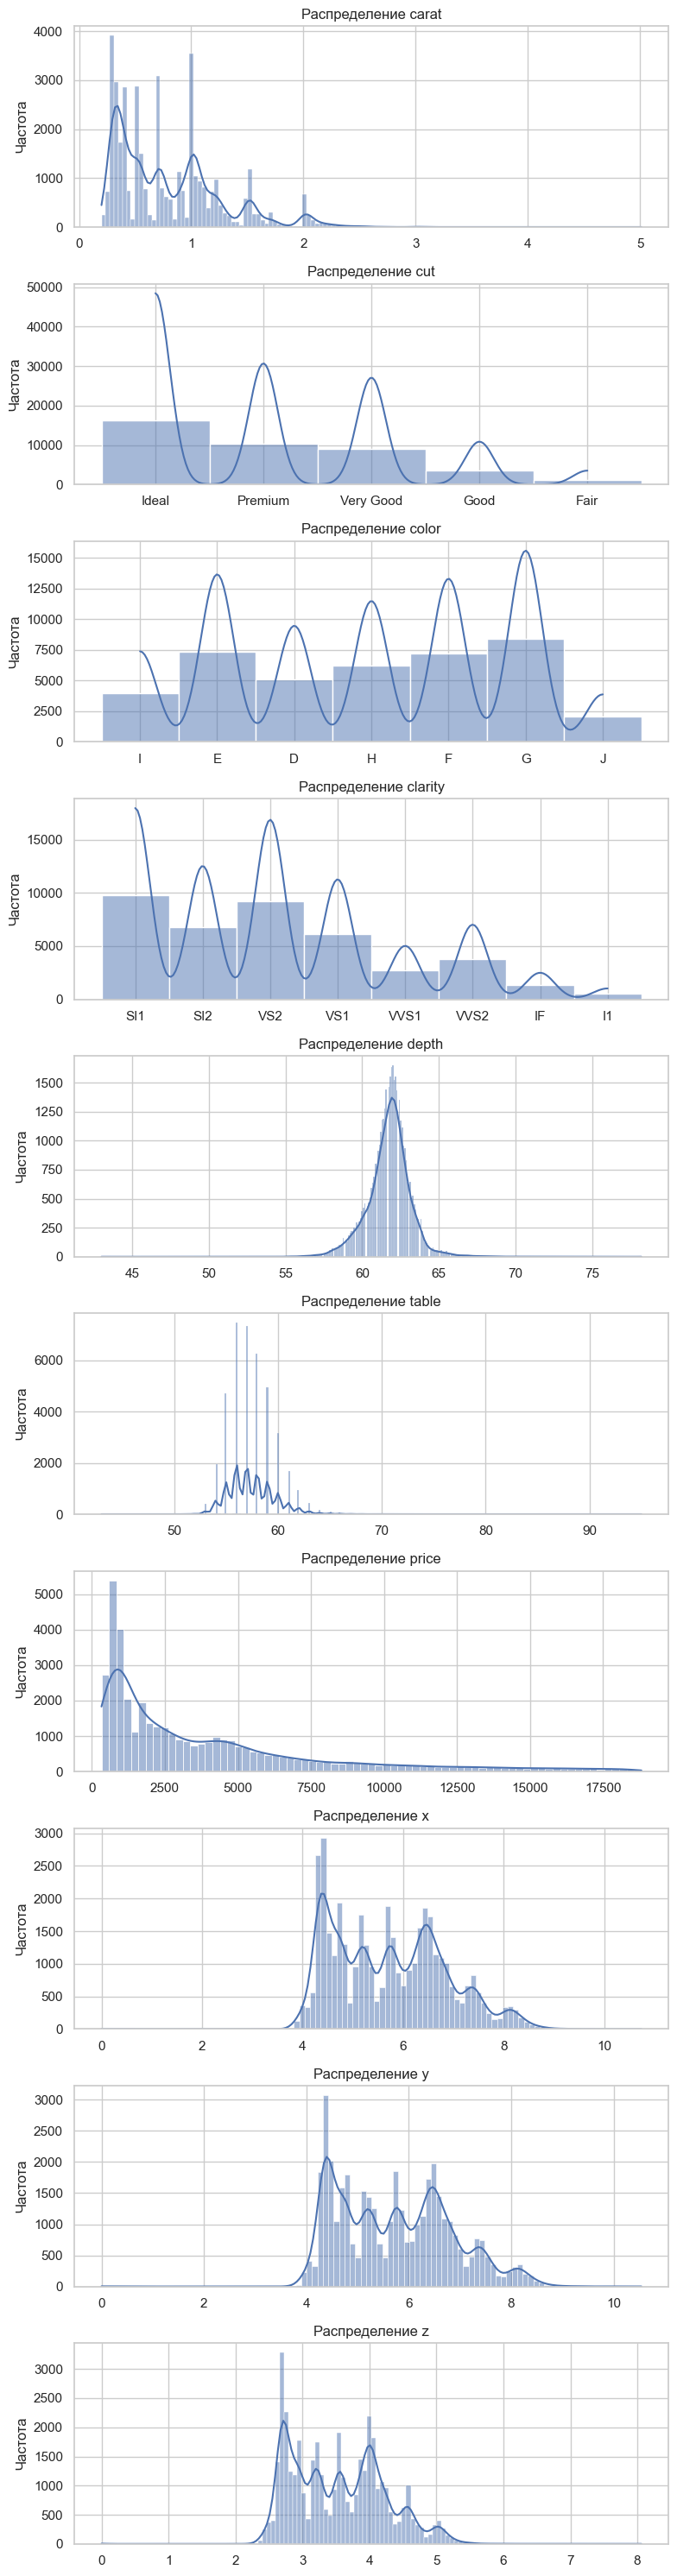

In [96]:
#Из распределения графиков поймем, какие encoders и scalers будем использовать в columntransformere

# Установим стиль графиков
sns.set(style="whitegrid")

# Определяем размер общей сетки графиков
num_cols = len(df.columns)
fig, axes = plt.subplots(num_cols, 1, figsize=(8, num_cols * 3))

# Построение графиков распределения для каждой переменной
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])  # kde=True добавляет кривую плотности
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Частота')

plt.tight_layout()  # Упорядочить графики, чтобы не было наложений
plt.show()


In [98]:
axis_features = ['x','y','z']

In [99]:

# Словари для маппинга категорий на числовые значения
clarity_dict = {'FL': 10, 'IF': 9, 'VVS1': 8, 'VVS2': 7, 'VS1': 6, 'VS2': 5, 
                'SI1': 4, 'SI2': 3, 'I1': 2, 'I2': 1, 'I3': 0}
cut_dict = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}
color_dict = {'D': 6, 'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1, 'J': 0}

# Трансформеры для категориальных переменных с использованием кодирования и масштабирования
clarity_pipeline = Pipeline(steps=[
    ('encoder', ce.OrdinalEncoder(mapping=[{'col': 'clarity', 'mapping': clarity_dict}])),
    ('std_scaler', StandardScaler())
])

cut_pipeline = Pipeline(steps=[
    ('encoder', ce.OrdinalEncoder(mapping=[{'col': 'cut', 'mapping': cut_dict}])),
    ('minmax_scaler', MinMaxScaler())
])

color_pipeline = Pipeline(steps=[
    ('encoder', ce.OrdinalEncoder(mapping=[{'col': 'color', 'mapping': color_dict}])),
    ('minmax_scaler', MinMaxScaler())
])

# Трансформер для числового столбца carat с использованием робастного масштабирования
carat_pipeline = Pipeline(steps=[
    ('robust_scaler', RobustScaler())  
])

transformer_numeric = Pipeline(steps=[
    ('imputer',KNNImputer(missing_values=0, add_indicator=False, n_neighbors = 4, weights = "uniform")),
    ('scaler', MinMaxScaler())  
])

# Трансформер для carat с созданием полиномиальных признаков и последующим масштабированием
carat_poly_pipeline = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('minmax_scaler', MinMaxScaler())
])

# Полиномиальные признаки для переменных x, y, z
xyz_pipeline = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('minmax_scaler', MinMaxScaler())
])

# Объединение всех трансформеров в ColumnTransformer
transformer = ColumnTransformer([
    ("clarity_transform", clarity_pipeline, ['clarity']),
    ("cut_transform", cut_pipeline, ['cut']),
    ("color_transform", color_pipeline, ['color']),
    ("transformer_numeric", transformer_numeric, axis_features),
    ("carat_transform", carat_pipeline, ['carat']),
    ("carat_poly_transform", carat_poly_pipeline, ['carat']),
    ("xyz_transform", xyz_pipeline, axis_features)
])

# Отображение собранного ColumnTransformer
display(transformer)


ColumnTransformer(transformers=[('clarity_transform',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['clarity']),
                                ('cut_transform',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder(mapping=[{'col': 'cut',
                                                                           'data_type...
                                 Pipeline(steps=[('robust_scaler',
                                                  RobustScaler())]),
                                 ['carat']),
                                ('carat_poly_transform',
                                 Pipeline(steps=[('poly_features',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('minmax_scaler',
                                                  MinMaxScaler())]),
                                 ['carat']),
                                ('xyz_transform',
                                 Pipeline(steps=[('poly_features',
                                                  PolynomialFeatures(include_bias=False,
                                                                     interaction_only=True)),
                                                 ('minmax_scaler',
                                                  MinMaxScaler())]),
                                 ['x', 'y', 'z'])])

In [100]:
df.describe()


,carat,depth,table,price,x,y,z
count,40377.00000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000
mean,0.79713,61.745600,57.452126,3938.759690,5.728777,5.730639,3.536795
std,0.47404,1.420043,2.231121,3998.041468,1.122689,1.114917,0.695159
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,946.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.000000,6.540000,6.530000,4.030000
max,5.01000,78.200000,95.000000,18818.000000,10.740000,10.540000,8.060000


In [101]:
# Функция оценки
def mse_irq(y_true, y_pred):
    delta = y_pred - y_true
    q_25 = np.quantile(delta, 0.25)
    q_75 = np.quantile(delta, 0.75)
    irq = q_75 - q_25
    mask = (delta < q_25 - 1.5 * irq) | (delta > q_75 + 1.5 * irq)
    if delta[mask].sum() == 0:
        result = 0
    else:
        result = -np.sum((delta[mask])**2) / len(delta[mask])
    return result

# Создаем scorer
scoring_mse_irq = make_scorer(mse_irq, greater_is_better=True)

In [102]:
# Создание модели
X = df.drop("price", axis=1)
y = df["price"]

# Модели и параметры
models = {
    "KNeighborsRegressor": (KNeighborsRegressor(), {
        "regressor__n_neighbors": [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20],
        "regressor__weights": ['uniform', 'distance'],
        "regressor__metric": ['euclidean', 'manhattan', 'minkowski']
    }),
    "RANSACRegressor": (RANSACRegressor(estimator=Ridge()), {
        "regressor__estimator__alpha": [0.1, 1.0, 10.0],
        "regressor__min_samples": [0.2, 0.5, 0.7],
        "regressor__residual_threshold": [0.1, 0.5, 1.0]
    }),
    "Ridge": (Ridge(), {
        "regressor__alpha": [0.1, 1.0, 10.0]
    }),
    "Lasso": (Lasso(), {
        "regressor__alpha": [0.1, 1.0, 10.0]
    })
}

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

# Словарь для хранения результатов
results = {}

# Обучение моделей и подбор параметров
for model_name, (model, param_grid) in models.items():
    # Создаем pipeline
    pipeline = Pipeline(steps=[
        ("preprocessor", CT),  # Убедитесь, что CT корректно работает
        ("regressor", model)
    ])
    
    # Инициализируем GridSearchCV
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring=scoring_mse_irq, verbose=0, n_jobs=-1)
    
    # Запускаем GridSearch
    grid_search.fit(X_train, y_train)
    
    # Лучшая модель и предсказание
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Оценка модели по метрике mse_irq
    mse_irq_score = mse_irq(y_test, y_pred) 
    results[model_name] = {
        "best_params": grid_search.best_params_,
        "mse_irq": mse_irq_score
    }

# Вывод всех комбинаций параметров и результатов кросс-валидации
    print(f"\n{model_name} - результаты всех параметров:")
    for mean_score, params in zip(grid_search.cv_results_["mean_test_score"], grid_search.cv_results_["params"]):
        print(f"Параметры: {params}, Среднее значение метрики MSE_IRQ: {mean_score:.2f}")

# Вывод лучших результатов
print("\nЛучшие результаты:")
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Лучшие параметры: {result['best_params']}")
    print(f"  MSE_IRQ Score: {result['mse_irq']:.2f}")  


D:\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



KNeighborsRegressor - результаты всех параметров:
Параметры: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 3, 'regressor__weights': 'uniform'}, Среднее значение метрики MSE_IRQ: -1974540.61
Параметры: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 3, 'regressor__weights': 'distance'}, Среднее значение метрики MSE_IRQ: -1972208.49
Параметры: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 4, 'regressor__weights': 'uniform'}, Среднее значение метрики MSE_IRQ: -1919323.06
Параметры: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 4, 'regressor__weights': 'distance'}, Среднее значение метрики MSE_IRQ: -1886956.40
Параметры: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 5, 'regressor__weights': 'uniform'}, Среднее значение метрики MSE_IRQ: -1885657.48
Параметры: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 5, 'regressor__weights': 'distance'}, Среднее значение метрики MSE_IRQ: -1850399.86
Параметры: {'reg

D:\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



RANSACRegressor - результаты всех параметров:
Параметры: {'regressor__estimator__alpha': 0.1, 'regressor__min_samples': 0.2, 'regressor__residual_threshold': 0.1}, Среднее значение метрики MSE_IRQ: -28277769.39
Параметры: {'regressor__estimator__alpha': 0.1, 'regressor__min_samples': 0.2, 'regressor__residual_threshold': 0.5}, Среднее значение метрики MSE_IRQ: -17114521.66
Параметры: {'regressor__estimator__alpha': 0.1, 'regressor__min_samples': 0.2, 'regressor__residual_threshold': 1.0}, Среднее значение метрики MSE_IRQ: -17367640.28
Параметры: {'regressor__estimator__alpha': 0.1, 'regressor__min_samples': 0.5, 'regressor__residual_threshold': 0.1}, Среднее значение метрики MSE_IRQ: -35829164.09
Параметры: {'regressor__estimator__alpha': 0.1, 'regressor__min_samples': 0.5, 'regressor__residual_threshold': 0.5}, Среднее значение метрики MSE_IRQ: -17262705.10
Параметры: {'regressor__estimator__alpha': 0.1, 'regressor__min_samples': 0.5, 'regressor__residual_threshold': 1.0}, Среднее зн

D:\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Ridge - результаты всех параметров:
Параметры: {'regressor__alpha': 0.1}, Среднее значение метрики MSE_IRQ: -14034146.19
Параметры: {'regressor__alpha': 1.0}, Среднее значение метрики MSE_IRQ: -14932819.73
Параметры: {'regressor__alpha': 10.0}, Среднее значение метрики MSE_IRQ: -15994956.28


D:\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Lasso - результаты всех параметров:
Параметры: {'regressor__alpha': 0.1}, Среднее значение метрики MSE_IRQ: -14157398.74
Параметры: {'regressor__alpha': 1.0}, Среднее значение метрики MSE_IRQ: -16031908.98
Параметры: {'regressor__alpha': 10.0}, Среднее значение метрики MSE_IRQ: -16743599.90

Лучшие результаты:
KNeighborsRegressor:
  Лучшие параметры: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 12, 'regressor__weights': 'distance'}
  MSE_IRQ Score: -1777570.74
RANSACRegressor:
  Лучшие параметры: {'regressor__estimator__alpha': 1.0, 'regressor__min_samples': 0.5, 'regressor__residual_threshold': 1.0}
  MSE_IRQ Score: -16563970.82
Ridge:
  Лучшие параметры: {'regressor__alpha': 0.1}
  MSE_IRQ Score: -15706371.82
Lasso:
  Лучшие параметры: {'regressor__alpha': 0.1}
  MSE_IRQ Score: -15187732.22


D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e+10, tolerance: 5.140e+07
  model = cd_fast.enet_coordinate_descent(
